# Calm Turkish (App Store)

## Importing the Libraries

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect_langs, detect
import re

In [184]:
df = pd.read_csv("https://raw.githubusercontent.com/delaltomruk/meditation-proj/main/data/appstore_calm_tr.csv?token=APZEDMZZZQARKDJ2QN3G6ZDALHWFE")

In [185]:
df.head()

,Unnamed: 0,date,rating,review
0,0,2020-07-06 20:34:43,5,Harry’s part of this app so um yes I’m downloa...
1,1,2018-08-22 23:19:41,3,tamam güzel program bi sürü hikaye müzik koymu...
2,2,2019-07-18 13:08:41,5,Türkçe dil desteği var mı ? Ona göre yükleyeceğim
3,3,2019-06-10 22:29:13,1,200 dolar aylık benim maaşım ediyor yahu
4,4,2020-05-11 06:12:04,1,- türkçe dil desteğin yok ( ingilizce bilmeyen...


In [186]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [187]:
df["year"] = pd.DatetimeIndex(df["date"]).year
df["month"] = pd.DatetimeIndex(df["date"]).month
df["day"] = pd.DatetimeIndex(df["date"]).day
df = df.drop(columns=["date"])

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  146 non-null    int64 
 1   review  146 non-null    object
 2   year    146 non-null    int64 
 3   month   146 non-null    int64 
 4   day     146 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.8+ KB


In [189]:
df.describe()

,rating,year,month,day
count,146.000000,146.000000,146.000000,146.000000
mean,3.431507,2017.993151,5.609589,14.424658
std,1.845433,1.716036,3.512290,8.666890
min,1.000000,2013.000000,1.000000,1.000000
25%,1.000000,2017.000000,2.000000,6.000000
50%,5.000000,2018.000000,5.000000,14.000000
75%,5.000000,2019.000000,9.000000,22.000000
max,5.000000,2021.000000,12.000000,29.000000


In [190]:
df.isna().sum()

rating    0
review    0
year      0
month     0
day       0
dtype: int64

In [191]:
from nltk import word_tokenize

words = [word_tokenize(i) for i in df.review]
len_tokens =[]

for i in range(len(words)):
    len_tokens.append(len(words[i]))
    
df["len_tokens"] = len_tokens
df.head()

,rating,review,year,month,day,len_tokens
0,5,Harry’s part of this app so um yes I’m downloa...,2020,7,6,15
1,3,tamam güzel program bi sürü hikaye müzik koymu...,2018,8,22,42
2,5,Türkçe dil desteği var mı ? Ona göre yükleyeceğim,2019,7,18,9
3,1,200 dolar aylık benim maaşım ediyor yahu,2019,6,10,7
4,1,- türkçe dil desteğin yok ( ingilizce bilmeyen...,2020,5,11,40


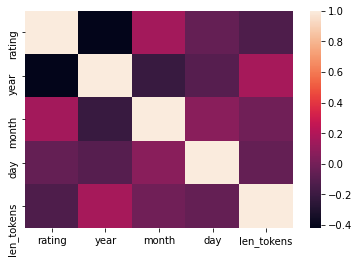

In [192]:
correlation = df.corr()
sns.heatmap(correlation);

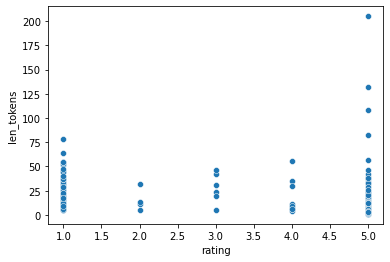

In [193]:
sns.scatterplot(x="rating", y="len_tokens", data=df);

## Looking at Reviews

In [194]:
df["review"] = df['review'].str.replace('[^\w\s]','')
df["review"] = [i.lower() for i in df.review]

In [195]:
df.head()

,rating,review,year,month,day,len_tokens
0,5,harrys part of this app so um yes im downloading,2020,7,6,15
1,3,tamam güzel program bi sürü hikaye müzik koymu...,2018,8,22,42
2,5,türkçe dil desteği var mı ona göre yükleyeceğim,2019,7,18,9
3,1,200 dolar aylık benim maaşım ediyor yahu,2019,6,10,7
4,1,türkçe dil desteğin yok ingilizce bilmeyen k...,2020,5,11,40


In [196]:
for i in df.review:
    
    try:
        language = detect(i)
    except:
        language = "error"
        print("This row throws and error:", i)

This row throws and error: 
This row throws and error: 
This row throws and error: 


We should remove the empty strings to detect the language.

In [197]:
df.review = df.review.replace(r'^\s+$', "no comment", regex=True)

In [198]:
df.isna().sum()

rating        0
review        0
year          0
month         0
day           0
len_tokens    0
dtype: int64

In [201]:
# make sure to remove the empty strings
lang = [detect(i)if i else "no comment" for i  in df.review]

In [202]:
df["lang"] = lang

In [203]:
a = df[df["lang"] =="no comment"]

In [204]:
a

,rating,review,year,month,day,len_tokens,lang
95,5,,2017,9,4,1,no comment
97,5,,2017,9,1,1,no comment
100,5,,2017,9,17,5,no comment


In [214]:
df[(df["lang"] != "tr") & (df["lang"] != "en")]

,rating,review,year,month,day,len_tokens,lang
20,5,süper,2020,7,14,1,et
22,5,just for harry,2020,7,13,3,no
30,1,neden hersey parali,2021,1,10,12,nl
33,5,sea is wonderfull,2020,5,3,3,af
39,5,here for 5sos,2020,3,25,3,da
48,5,zeyd,2019,9,1,1,pl
49,1,i can not unsubscribe,2019,9,27,5,ca
87,5,i do use it for sleeping,2017,12,3,6,no
93,5,superb,2017,9,15,2,id
95,5,,2017,9,4,1,no comment


In [217]:
# manually changing some of the wrong language predictions
df.lang.loc[20] = "tr"
df.lang.loc[22] = "en"
df.lang.loc[30] = "tr"
df.lang.loc[33] = "en"

df.lang.loc[39] = "en"
df.lang.loc[49] = "en"

df.lang.loc[87] = "en"
df.lang.loc[93] = "en"

df.lang.loc[105] = "en"
df.lang.loc[106] = "en"
df.lang.loc[123] = "en"
df.lang.loc[126] = "en"
df.lang.loc[131] = "en"
df.lang.loc[133] = "en"
df.lang.loc[136] = "en"
df.lang.loc[142] = "en"

In [220]:
df[(df["lang"] != "en") & (df.lang != "tr")]

,rating,review,year,month,day,len_tokens,lang
48,5,zeyd,2019,9,1,1,pl
95,5,,2017,9,4,1,no comment
97,5,,2017,9,1,1,no comment
100,5,,2017,9,17,5,no comment


Although this is for Calm App Turkish reviews, there are lots of english comments as well.

In [221]:
# english data
df_eng = df[df.lang == "en"]
df_tr = df[df.lang =="tr"]

# Data Visualization

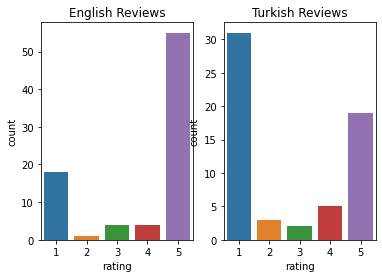

In [235]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="rating", ax=ax[0], data=df_eng).set_title("English Reviews");
sns.countplot(x="rating", ax=ax[1], data=df_tr).set_title("Turkish Reviews");

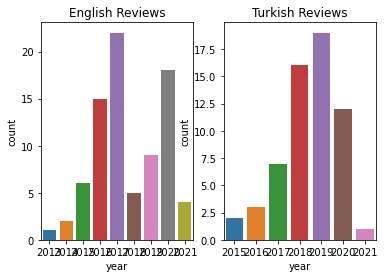

In [238]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="year", ax=ax[0], data=df_eng).set_title("English Reviews");
sns.countplot(x="year", ax=ax[1], data=df_tr).set_title("Turkish Reviews");

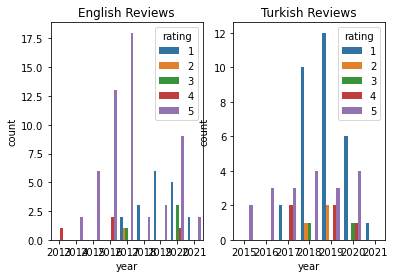

In [242]:
fig, ax = plt.subplots(1,2)
sns.countplot(x="year", ax=ax[0], data=df_eng, hue="rating").set_title("English Reviews");
sns.countplot(x="year", ax=ax[1], data=df_tr, hue="rating").set_title("Turkish Reviews");

# Word Cloud

## English Reviews

In [256]:
df_eng.rating.value_counts()

5    55
1    18
4     4
3     4
2     1
Name: rating, dtype: int64

In [257]:
df_eng[df_eng.rating == 2]

,rating,review,year,month,day,len_tokens,lang
86,2,app is crushing on my iphone x since i got it,2017,12,28,13,en


In [245]:
en_1 = df_eng[(df_eng["rating"] == 1)]
en_2 = df_eng[(df_eng["rating"] == 2)]
en_3 = df_eng[(df_eng["rating"] == 3)]
en_4 = df_eng[(df_eng["rating"] == 4)]
en_5 = df_eng[(df_eng["rating"] == 5)]

In [247]:
en_text_1 = " ".join(review for review in en_1.review)
en_text_2 = " ".join(review for review in en_2.review)
en_text_3 = " ".join(review for review in en_3.review)
en_text_4 = " ".join(review for review in en_4.review)
en_text_5 = " ".join(review for review in en_5.review)

In [265]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["app", "meditation", "using", "calm"])


en_cloud_1 = WordCloud(stopwords=stopwords, background_color="white").generate(en_text_1)
en_cloud_2 = WordCloud(stopwords=stopwords, background_color="white").generate(en_text_2)
en_cloud_3 = WordCloud(stopwords=stopwords, background_color="white").generate(en_text_3)
en_cloud_4 = WordCloud(stopwords=stopwords, background_color="white").generate(en_text_4)
en_cloud_5 = WordCloud(stopwords=stopwords, background_color="white").generate(en_text_5)

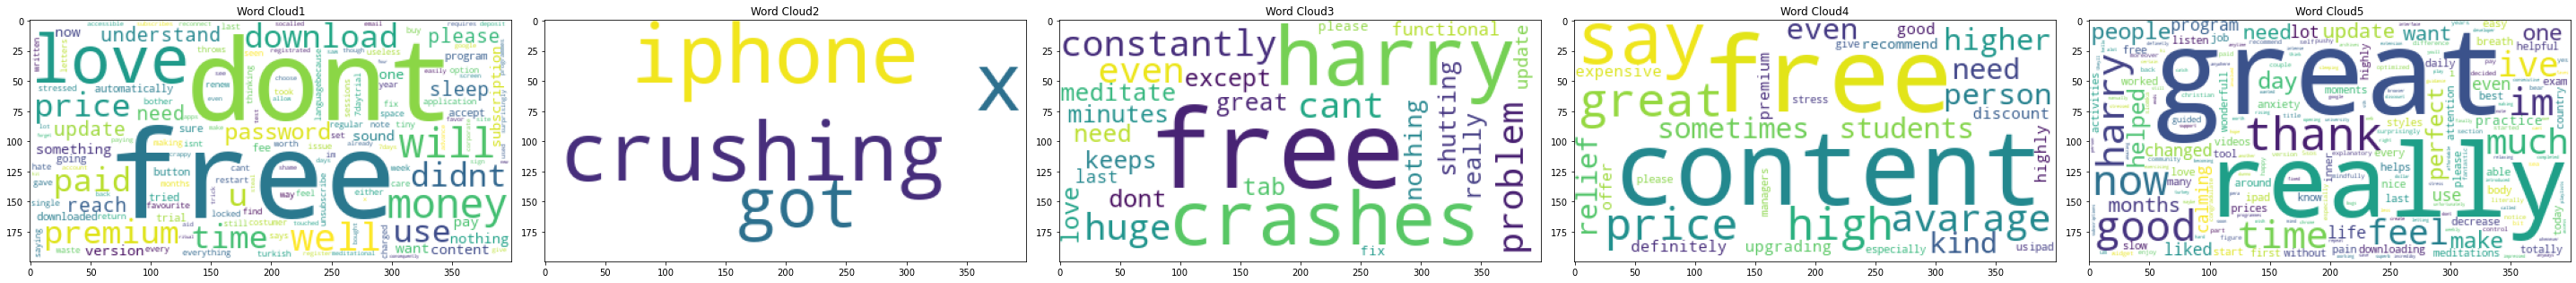

In [266]:
width=5
height=5
rows = 1
cols = 5
axes=[]
fig=plt.figure(figsize=(40, 40))

for a in range(rows*cols):
    cloud = [en_cloud_1, en_cloud_2, en_cloud_3, en_cloud_4, en_cloud_5]
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Word Cloud"+str(a + 1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(cloud[a])
fig.tight_layout()    
plt.show()

## Turkish Reviews

In [258]:
df_tr.rating.value_counts()

1    31
5    19
4     5
2     3
3     2
Name: rating, dtype: int64

In [259]:
tr_1 = df_tr[(df_tr["rating"] == 1)]
tr_2 = df_tr[(df_tr["rating"] == 2)]
tr_3 = df_tr[(df_tr["rating"] == 3)]
tr_4 = df_tr[(df_tr["rating"] == 4)]
tr_5 = df_tr[(df_tr["rating"] == 5)]

In [260]:
tr_text_1 = " ".join(review for review in tr_1.review)
tr_text_2 = " ".join(review for review in tr_2.review)
tr_text_3 = " ".join(review for review in tr_3.review)
tr_text_4 = " ".join(review for review in tr_4.review)
tr_text_5 = " ".join(review for review in tr_5.review)

In [280]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/delaldeniztomruk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [281]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(stopwords.words("turkish"))
stopwords.update(["etmek", "bir", "uygulama"])


tr_cloud_1 = WordCloud(stopwords=stopwords, background_color="white").generate(tr_text_1)
tr_cloud_2 = WordCloud(stopwords=stopwords, background_color="white").generate(tr_text_2)
tr_cloud_3 = WordCloud(stopwords=stopwords, background_color="white").generate(tr_text_3)
tr_cloud_4 = WordCloud(stopwords=stopwords, background_color="white").generate(tr_text_4)
tr_cloud_5 = WordCloud(stopwords=stopwords, background_color="white").generate(tr_text_5)

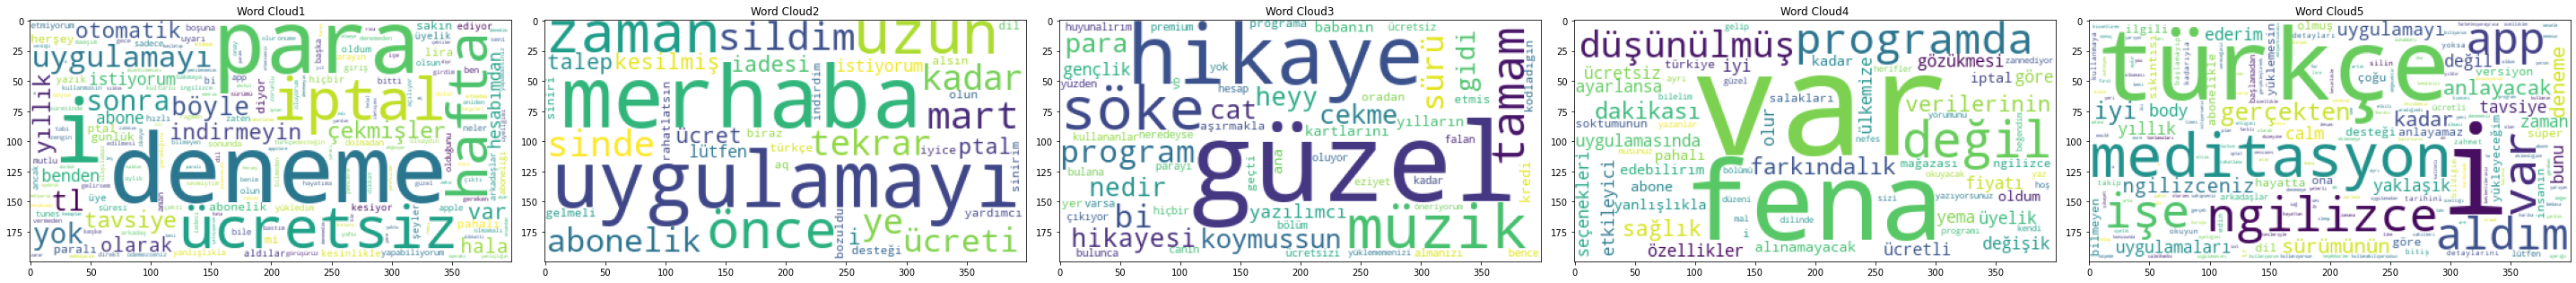

In [282]:
width=5
height=5
rows = 1
cols = 5
axes=[]
fig=plt.figure(figsize=(40, 40))

for a in range(rows*cols):
    cloud = [tr_cloud_1, tr_cloud_2, tr_cloud_3, tr_cloud_4, tr_cloud_5]
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Word Cloud"+str(a + 1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(cloud[a])
fig.tight_layout()    
plt.show()

# Implementing TF-IDF

## English Reviews

In [285]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS

In [288]:
stopwords = set(STOPWORDS)

### Rating 1

In [289]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(en_1.review)
X = vect.transform(en_1.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,app,didnt,dont,free,love,money,paid,use,well,will
0,0.865688,0.0,0.378343,0.327781,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.099625,0.0,0.130621,0.000000,0.986414,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
3,0.660777,0.0,0.000000,0.750583,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.499417,0.0,0.654799,0.567292,0.000000,0.0,0.0,0.0,0.0,0.0


In [290]:
len(en_1.index)

18

In [292]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-292-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [293]:
print(en_1[en_1['review'].str.contains("love")]["review"])

8    i love love love calm however last 6 months the application throws me out every time i update it but still same i love to sleep with the sounds but until i can reach i feel more stressed i need to restart the app like 10 times please do something to fix this i would love to buy the premium version but i dont want because of this issue
Name: review, dtype: object


In [294]:
print(en_1[en_1['review'].str.contains("well")]["review"])

19     please update turkish languagebecause i cant understand very well                                                                                                                                                                            
69     its one of those apps that trick you into paying a lot of money for a crappy socalled meditational aid that can easily be accessible on any meditation site on google as well                                                                
99     they used to give 7 days programmes as free now it requires a 7days trial to use them as well which not surprisingly automatically subscribes to the premium content \n\nshame on you for going corporate                                    
112    i tried to reconnect my account even though i was sure with the app the app didnt accept my password consequently i hit the forget password button the app didnt accept my new password as well i tried the same ritual for four times but no
Name: review, dtype:

In [297]:
# skipping 2 rating since there was only one comment.

### Rating 3

In [298]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(en_3.review)
X = vect.transform(en_3.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,121,app,free,minutes,need,nothing,please,problem,really,shutting
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.345783,0.000000,0.541736,0.000000,0.000000,0.000000,0.541736,0.000000,0.541736
2,0.000000,0.234522,0.734847,0.000000,0.367423,0.367423,0.000000,0.000000,0.367423,0.000000
3,0.644503,0.411378,0.000000,0.000000,0.000000,0.000000,0.644503,0.000000,0.000000,0.000000


In [299]:
print(en_3[en_3['review'].str.contains("minutes")]["review"])

37    app crashes constantly and its a huge problem i cant even meditate for 8 minutes because it keeps shutting down
Name: review, dtype: object


In [302]:
print(en_3[en_3['review'].str.contains("121")]["review"])

102    i love this app but the meditation tab has not been functional since the last update 121 please fix
Name: review, dtype: object


### Rating 4

In [303]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(en_4.review)
X = vect.transform(en_4.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,app,premium,price,recommend,relief,say,sometimes,stress,students,upgrading
0,0.234522,0.367423,0.367423,0.000000,0.367423,0.367423,0.367423,0.000000,0.367423,0.367423
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [306]:
print(en_4[en_4['review'].str.contains("students")]["review"])

31    i have been using the free content for a while and i should say that the app is great however the price is too high for an avarage person and even higher for the students who sometimes need this kind of meditation to relief definitely upgrading to premium if they offer discount
Name: review, dtype: object


In [308]:
print(df[df['review'].str.contains("students")]["review"])

31    i have been using the free content for a while and i should say that the app is great however the price is too high for an avarage person and even higher for the students who sometimes need this kind of meditation to relief definitely upgrading to premium if they offer discount
Name: review, dtype: object


### Rating 5

In [307]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(en_5.review)
X = vect.transform(en_5.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,app,calm,good,great,im,meditation,now,really,thank,using
0,0.487712,0.000000,0.0,0.0,0.873005,0.000000,0.0,0.0,0.000000,0.000000
1,0.425846,0.694448,0.0,0.0,0.000000,0.579998,0.0,0.0,0.000000,0.000000
2,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.367404,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.657653,0.657653


## Turkish Reviews

In [311]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/delaldeniztomruk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [312]:
stopwords = set(stopwords.words("turkish"))
stopwords.update(["etmek", "bir", "uygulama"])

### Rating 1

In [313]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(tr_1.review)
X = vect.transform(tr_1.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

,deneme,hafta,indirmeyin,iptal,para,sonra,tl,uygulamayı,yok,ücretsiz
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.783074,0.621928
2,0.264284,0.0,0.0,0.304984,0.914953,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [316]:
print(tr_1[tr_1['review'].str.contains("indirmeyin")]["review"])

14    sakın indirmeyin 7 günlük deneme başlatıp abonelik iptal etmezseniz otomatik 159tl yıllık abonelik kesiyor benden aldılar haram zıkkkım olsun şerefsizler                                                                                                   
67    ücretsiz gibi yapılan uygulama gözüksede indirdiğiniz an bir hafta içinde 199 lira hesabınızdan çekiyor ve türkcell biz birşey yapamayız i tunes store u arayın diyor iptal etmek için hala uğraşıyorum sakın indirmeyin benden tavsiye                     
68    i̇çeriğindeki tüm herşey paralı 7 gün deneme diyor olduki unutursanız seneliği 200 tl böyle bi aplikasyona hayatta para vermem ki ücretsiz neler neler var boşuna indirmeyin                                                                                
77    uygulamayı ücretsiz diye indirdim ancak bir hafta sonra 11999 tl hesabımdan çekildi kesinlikle indirmeyin altta ufak puntolarla açıklama koyuyorlar ve normal olarak siz görmeyince uygulamayı kuruyorsunuz bir hafta son

### Rating 2

In [317]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(tr_2.review)
X = vect.transform(tr_2.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

,2020,ptal,rahatlatsın,sildim,sinde,siniri,sinirim,talep,tekrar,uygulamayı
0,0.377964,0.377964,0.00000,0.377964,0.377964,0.00000,0.00000,0.377964,0.377964,0.377964
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.57735,0.000000,0.000000,0.000000


In [319]:
print(tr_2[tr_2['review'].str.contains("tekrar")]["review"])

55    merhaba uygulamayı uzun zaman önce sildim mart 2 sinde tekrar 2020 ye kadar abonelik ücreti kesilmiş i̇ptal etmek ve ücret iadesi talep etmek istiyorum lütfen yardımcı olun
Name: review, dtype: object


### Rating 3

In [320]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(tr_3.review)
X = vect.transform(tr_3.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

,güzel,hikaye,müzik,nedir,neredeyse,oluyor,oradan,para,parayı,söke
0,0.230617,0.230617,0.230617,0.324123,0.000000,0.000000,0.324123,0.324123,0.324123,0.648247
1,0.379303,0.379303,0.379303,0.000000,0.533098,0.533098,0.000000,0.000000,0.000000,0.000000


In [323]:
print(tr_3[tr_3['review'].str.contains("müzik")]["review"])

1     tamam güzel program bi sürü hikaye müzik koymussun o cat diye para cekme hikayesi nedir heyy gidi yazılımcı gençlik yılların ana babanın  kredi kartlarını aşırmakla mı geçti oradan da kodladıgın programa yer etmis huyunalırım o parayı söke söke                
17    bence çok güzel bir uygulama ama ücretsiz hesap kullananlar için eziyet neredeyse hiçbir hikaye müzik vb ücretsizi yok varsa da \n1 bulana kadar canın çıkıyor \n2 bulunca da bir bölüm falan oluyor o yüzden ya premium almanızı ya da hiç yüklememenizi öneriyorum
Name: review, dtype: object


### Rating 4

In [324]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(tr_4.review)
X = vect.transform(tr_4.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

,abone,ngilizce,okuyacak,oldum,olur,pahalı,programda,programı,salakları,var
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.523358,0.523358,0.523358,0.0,0.0,0.422242
2,0.707107,0.0,0.0,0.707107,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.5,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000


In [330]:
print(tr_4[tr_4['review'].str.contains("pahal")]["review"])

46    programda her şey düşünülmüş farkındalık dakikası verilerinin sağlık uygulamasında gözükmesi ve değişik yema seçenekleri çok etkileyici ücretsiz özellikler var ama fiyatı ülkemize göre ayarlansa daha iyi olur ücretli üyelik alınamayacak kadar pahalı
Name: review, dtype: object


### Rating 5

In [331]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(tr_5.review)
X = vect.transform(tr_5.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

,aldım,app,calm,gerçekten,iyi,işe,meditasyon,ngilizce,türkçe,var
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.645257,0.763965
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.0,0.0,0.683914,0.0,0.0,0.299974,0.494164,0.270187,0.228204,0.270187


In [332]:
print(tr_5[tr_5['review'].str.contains("işe")]["review"])

40    abonelikle ilgili çoğu insanın sıkıntısı olmuş arkadaşlar bu ücretli bir uygulama lütfen bir işe başlamadan deneme sürümünün detaylarını okuyun deneme sürümünün bitiş tarihini takip edin o detayları anlayacak kadar i̇ngilizceniz yoksa da bir zahmet uygulamayı kullanmaya başlamayıp silin bildiğim kadarıyla türkçe meditasyon uygulamaları da var\ntr\ncalm uygulamasını yaklaşık 3 yıldır biliyorum ve yaklaşık 34 aydır da abone olarak kullanıyorum uygulamaları anlayacak yeterli i̇ngilizce düzeyine sahipseniz kesinlikle tavsiye ederim meditasyon tecrübeniz olması ya da olmaması hiç farketmiyorayrıca bu zamana kadar birçok yeni özellikler eklendiğine şahit oldum ve eklenmeye de devam ediyorkısacası memnun kalırsınız\n\nen\ntoday i tried calm body for the first timei would like to see more body sessions on calmthanks
72    i̇ngilizceniz var ise kullanın gerçekten işe yarıyor i̇lk 159 lira muhabbeti ise gerçek değil sağ üst köşede x e basınca kullanabiliyorsunuz uygulamayı uygulama kalitel